In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
X = df[['Pclass', 'Sex', 'Age', 'Fare']]
X.head()

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500


In [15]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [21]:
mean_age = X['Age'].mean()
int_mean_age = int(mean_age)
int_mean_age

29

In [29]:
X['Age'] = X['Age'].fillna(int_mean_age)

C:\Users\v11ch\AppData\Local\Temp\ipykernel_12464\1083443151.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Age'] = X['Age'].fillna(int_mean_age)


In [30]:
X.isnull().sum()

Pclass    0
Sex       0
Age       0
Fare      0
Sex_n     0
dtype: int64

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
le_sex = LabelEncoder()

In [43]:
X['Sex_n'] = le_sex.fit_transform(X['Sex'])
X.head()

C:\Users\v11ch\AppData\Local\Temp\ipykernel_12464\3349174203.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex_n'] = le_sex.fit_transform(X['Sex'])


,Pclass,Sex,Age,Fare,Sex_n
0,3,male,22.0,7.2500,1
1,1,female,38.0,71.2833,0
2,3,female,26.0,7.9250,0
3,1,female,35.0,53.1000,0
4,3,male,35.0,8.0500,1


In [58]:
X_n = X.drop(X[['Sex']], axis='columns').values
X_n

array([[ 3.    , 22.    ,  7.25  ,  1.    ],
       [ 1.    , 38.    , 71.2833,  0.    ],
       [ 3.    , 26.    ,  7.925 ,  0.    ],
       ...,
       [ 3.    , 29.    , 23.45  ,  0.    ],
       [ 1.    , 26.    , 30.    ,  1.    ],
       [ 3.    , 32.    ,  7.75  ,  1.    ]])

In [59]:
y = df['Survived'].values
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [60]:
from sklearn import tree

In [61]:
model = tree.DecisionTreeClassifier()

In [62]:
model.fit(X_n, y)

DecisionTreeClassifier()

In [63]:
model.score(X_n, y)

0.9741863075196409

In [68]:
model.predict([[1, 40, 55.5, 0]])

array([1], dtype=int64)

In [69]:
from sklearn.metrics import confusion_matrix

In [70]:
y_pred = model.predict(X_n)

In [71]:
cm = confusion_matrix(y, y_pred)
cm

array([[546,   3],
       [ 20, 322]], dtype=int64)

Text(51.0, 0.5, 'Truth')

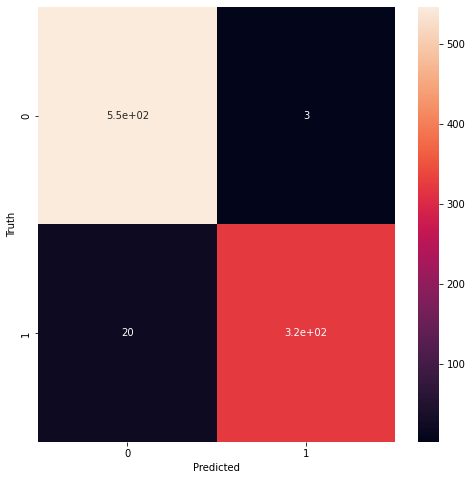

In [74]:
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')